#Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.shape

(400, 5)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
col_names = df.columns

col_names

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['Gender']


In [10]:
df[categorical].head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [11]:
df[categorical].isnull().sum()

,0
Gender,0


#Frequency counts of categorical variables:

In [12]:
for var in categorical:

    print(df[var].value_counts())

Gender
Female    204
Male      196
Name: count, dtype: int64


#Number of labels: cardinality

In [13]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Gender  contains  2  labels


#Explore Gender variable

In [14]:
print('Gender contains', len(df.Gender.unique()), 'labels')

Gender contains 2 labels


In [15]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df.Gender.value_counts()

,count
Gender,
Female,204
Male,196


In [17]:
pd.get_dummies(df.Gender, drop_first=True).head()

,Male
0,True
1,True
2,False
3,False
4,True


#Explore Purchased variable

In [18]:
print('Purchased contains', len(df['Purchased'].unique()), 'labels')

Purchased contains 2 labels


In [19]:
df['Purchased'].unique()

array([0, 1])

#Explore Numerical Variables

In [20]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['User ID', 'Age', 'EstimatedSalary', 'Purchased']


In [21]:
df[numerical].head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


#Missing values in numerical variables

In [22]:
df[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0
Purchased,0


#Outliers in numerical variables

In [23]:
print(round(df[numerical].describe()),2)

          User ID    Age  EstimatedSalary  Purchased
count       400.0  400.0            400.0      400.0
mean   15691540.0   38.0          69742.0        0.0
std       71658.0   10.0          34097.0        0.0
min    15566689.0   18.0          15000.0        0.0
25%    15626764.0   30.0          43000.0        0.0
50%    15694342.0   37.0          70000.0        0.0
75%    15750363.0   46.0          88000.0        1.0
max    15815236.0   60.0         150000.0        1.0 2


Text(0, 0.5, 'Purchased')

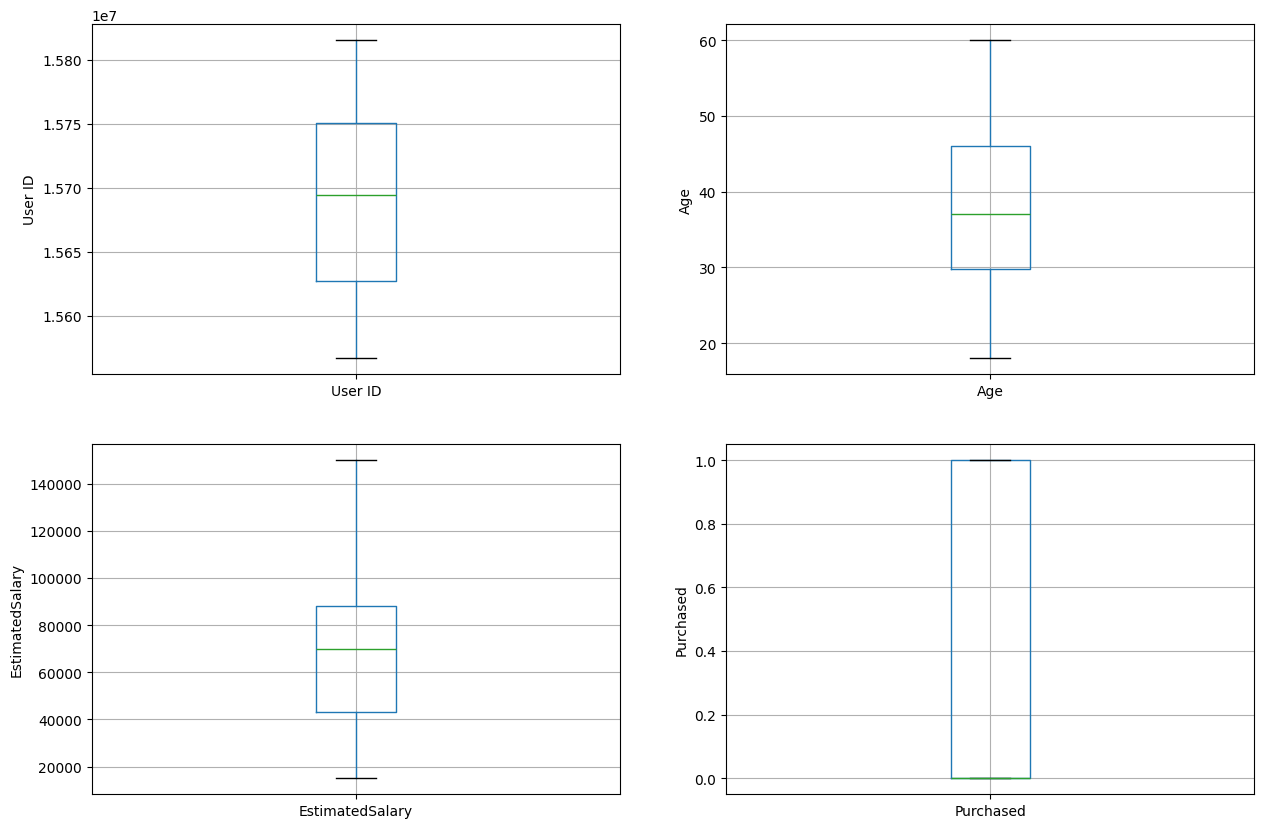

In [24]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='User ID')
fig.set_title('')
fig.set_ylabel('User ID')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='EstimatedSalary')
fig.set_title('')
fig.set_ylabel('EstimatedSalary')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Purchased')
fig.set_title('')
fig.set_ylabel('Purchased')

#Check the distribution of variables

Text(0, 0.5, 'Gender')

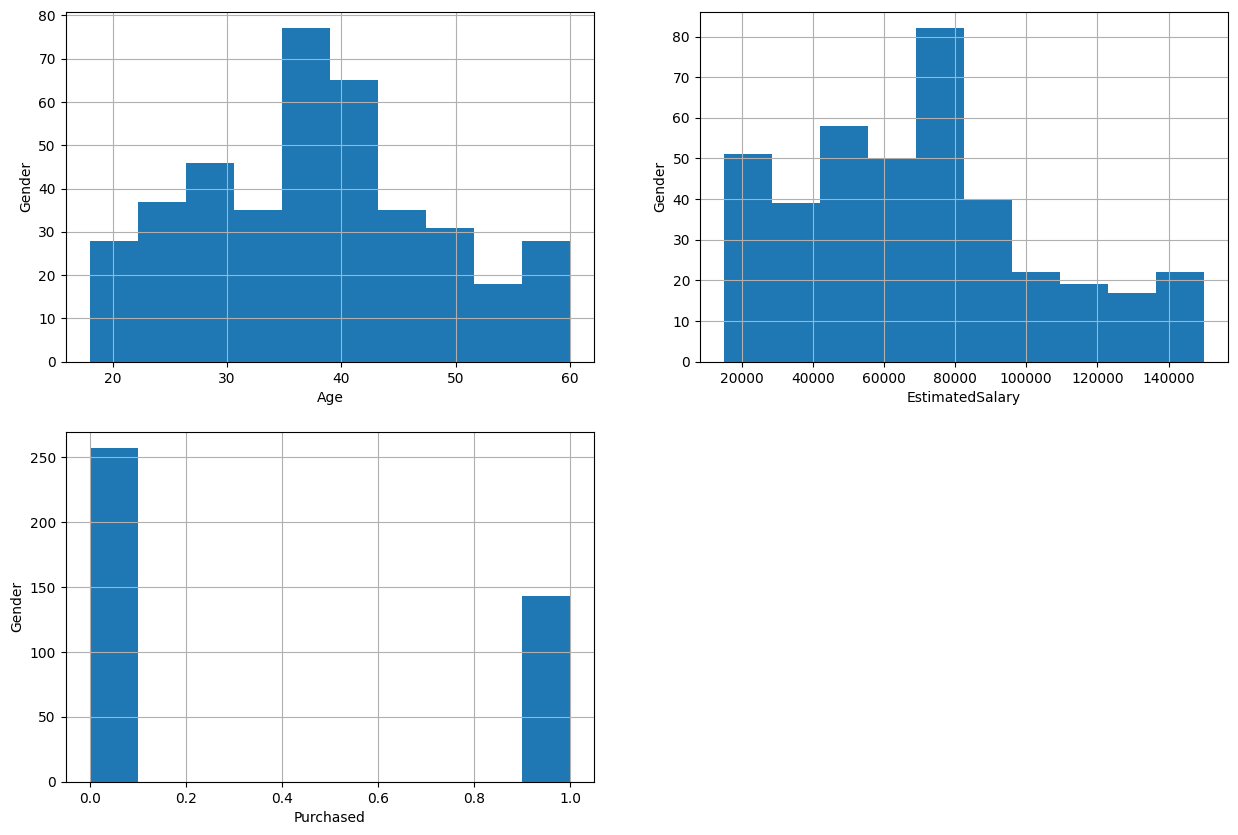

In [25]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Gender')


plt.subplot(2, 2, 2)
fig = df.EstimatedSalary.hist(bins=10)
fig.set_xlabel('EstimatedSalary')
fig.set_ylabel('Gender')


plt.subplot(2, 2, 3)
fig = df.Purchased.hist(bins=10)
fig.set_xlabel('Purchased')
fig.set_ylabel('Gender')

#Declare feature vector and target variable

In [26]:
X = df.drop(['Purchased'], axis=1)

y = df['Purchased']

#Split data into separate training and test set

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
X_train.shape, X_test.shape

((320, 4), (80, 4))

#Feature Engineering

In [29]:
X_train.dtypes

,0
User ID,int64
Gender,object
Age,int64
EstimatedSalary,int64


In [30]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Gender']

In [31]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['User ID', 'Age', 'EstimatedSalary']

#Engineering missing values in numerical variables

In [32]:
X_train[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0


In [33]:
X_test[numerical].isnull().sum()

,0
User ID,0
Age,0
EstimatedSalary,0


In [34]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

#Engineering missing values in categorical variables

In [35]:
X_train[categorical].isnull().mean()

,0
Gender,0.0


In [36]:
X_test[categorical].isnull().sum()

,0
Gender,0


In [37]:
X_train.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0


In [38]:
X_test.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0


#Encode categorical variables

In [39]:
categorical

['Gender']

In [40]:
X_train[categorical].head()

,Gender
336,Male
64,Female
55,Female
106,Female
300,Female


In [42]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.1 MB/s eta 0:00:00


In [43]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Gender'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [44]:
X_train.head()

,User ID,Gender_0,Gender_1,Age,EstimatedSalary
336,15664907,0,1,58,144000
64,15605000,1,0,59,83000
55,15649136,1,0,24,55000
106,15706185,1,0,26,35000
300,15736397,1,0,58,38000


In [45]:
X_train = pd.concat([X_train[numerical], X_train[['Gender_0', 'Gender_1']]], axis=1)

In [46]:
X_train.head()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1
336,15664907,58,144000,0,1
64,15605000,59,83000,1,0
55,15649136,24,55000,1,0
106,15706185,26,35000,1,0
300,15736397,58,38000,1,0


In [47]:
X_test = pd.concat([X_test[numerical], X_test[['Gender_0', 'Gender_1']]], axis=1)

In [48]:
X_test.head()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1
132,15725660,30,87000,0,1
309,15652400,38,50000,1,0
341,15776844,35,75000,0,1
196,15738448,30,79000,1,0
246,15638003,35,50000,1,0


#Feature Scaling

In [49]:
X_train.describe()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1
count,3.200000e+02,320.00000,320.000000,320.000000,320.000000
mean,1.569120e+07,38.21875,69928.125000,0.512500,0.487500
std,7.058254e+04,10.30304,34570.057299,0.500627,0.500627
min,1.556964e+07,18.00000,15000.000000,0.000000,0.000000
25%,1.562820e+07,30.00000,43000.000000,0.000000,0.000000
50%,1.569434e+07,38.00000,69500.000000,1.000000,0.000000
75%,1.574919e+07,46.00000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.00000,150000.000000,1.000000,1.000000


In [50]:
cols = X_train.columns

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [52]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [53]:
X_train.describe()

,User ID,Age,EstimatedSalary,Gender_0,Gender_1
count,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.494963,0.481399,0.406875,0.512500,0.487500
std,0.287394,0.245310,0.256074,0.500627,0.500627
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238426,0.285714,0.207407,0.000000,0.000000
50%,0.507749,0.476190,0.403704,1.000000,0.000000
75%,0.731089,0.666667,0.540741,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#Model training

In [55]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#Predict results

In [56]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

#Check accuracy score

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9375


#Compare the train-set and test-set accuracy

In [58]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [59]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8031


#Check for overfitting and underfitting

In [60]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8031
Test set score: 0.9375


fit the Logsitic Regression model with C=100

# instantiate the model

In [61]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [62]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8313
Test set score: 0.9125


In [63]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [64]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.6219
Test set score: 0.7250


#Compare model accuracy with null accuracy

In [65]:
y_test.value_counts()

,count
Purchased,
0,58
1,22


In [66]:
null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


#Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[58  0]
 [ 5 17]]

True Positives(TP) =  58

True Negatives(TN) =  17

False Positives(FP) =  0

False Negatives(FN) =  5


<Axes: >

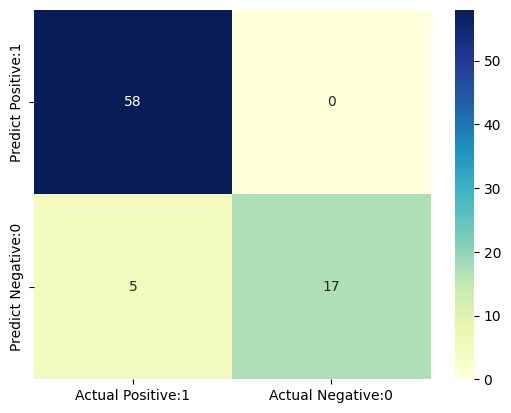

In [68]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#Classification metrices
classification Report

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       1.00      0.77      0.87        22

    accuracy                           0.94        80
   macro avg       0.96      0.89      0.92        80
weighted avg       0.94      0.94      0.93        80



Classification accuracy

In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [71]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9375


#Classification error

In [72]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0625


#Precision

In [73]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


#Recall

In [74]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9206


#True Positive Rate

In [75]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9206


#False Positive Rate

In [76]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


#Specificity

In [77]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


#Adjusting the threshold level

In [78]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.78011601, 0.21988399],
       [0.70961875, 0.29038125],
       [0.73669885, 0.26330115],
       [0.79950108, 0.20049892],
       [0.76629357, 0.23370643],
       [0.94727444, 0.05272556],
       [0.89749676, 0.10250324],
       [0.39435556, 0.60564444],
       [0.93846428, 0.06153572],
       [0.51342577, 0.48657423]])

In [79]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No purchased (0)', 'Prob of - purchased (1)'])

y_pred_prob_df

,Prob of - No purchased (0),Prob of - purchased (1)
0,0.780116,0.219884
1,0.709619,0.290381
2,0.736699,0.263301
3,0.799501,0.200499
4,0.766294,0.233706
5,0.947274,0.052726
6,0.897497,0.102503
7,0.394356,0.605644
8,0.938464,0.061536
9,0.513426,0.486574


In [80]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.21988399, 0.29038125, 0.26330115, 0.20049892, 0.23370643,
       0.05272556, 0.10250324, 0.60564444, 0.06153572, 0.48657423])

In [81]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

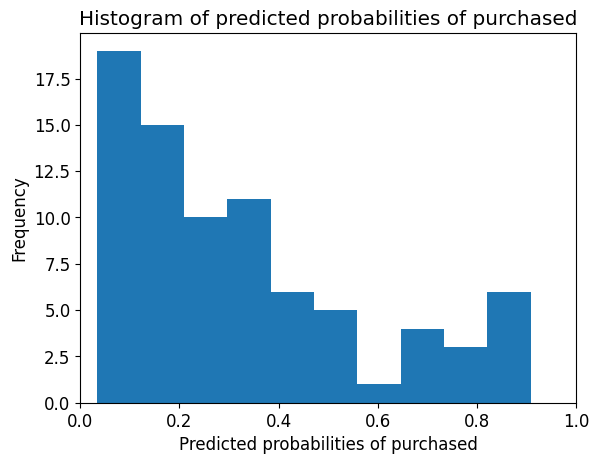

In [82]:
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of purchased')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of purchased')
plt.ylabel('Frequency')

#Lower the threshold

In [84]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)

    # y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No') # Removed this line to keep labels numerical

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[13 45]
 [ 0 22]] 

 with 35 correct predictions,  

 45 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.4375 

 Sensitivity:  1.0 

 Specificity:  0.22413793103448276 



With 0.2 threshold the Confusion Matrix is  

 [[31 27]
 [ 0 22]] 

 with 53 correct predictions,  

 27 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.6625 

 Sensitivity:  1.0 

 Specificity:  0.5344827586206896 



With 0.3 threshold the Confusion Matrix is  

 [[44 14]
 [ 0 22]] 

 with 66 correct predictions,  

 14 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.825 

 Sensitivity:  1.0 

 Specificity:  0.7586206896551724 



With 0.4 threshold the Confusion Matrix is  

 [[53  5]
 [ 3 19]] 

 with 72 correct predictions,  

 5 Type I errors( False Positives),  

 3 Type II errors( False Negatives),  

 Accuracy score:  0

#ROC - AUC

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


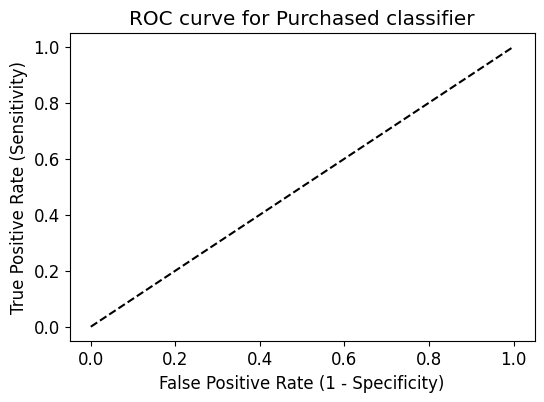

In [85]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Purchased classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [86]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9734


In [87]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9022


#Recursive Feature Elimination with Cross Validation

In [88]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [89]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 1


In [90]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [91]:
X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [92]:
print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.9250


#Confusion-matrix revisited

In [93]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[57  1]
 [ 5 17]]

True Positives(TP1) =  57

True Negatives(TN1) =  17

False Positives(FP1) =  1

False Negatives(FN1) =  5


#k-Fold Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.75     0.765625 0.75     0.8125   0.90625 ]


In [95]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7969


#Hyperparameter Optimization using GridSearch CV

In [96]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [97]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8281


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [98]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9125


#Results and Conclusion

1. The logistic regression model accuracy score is 0.9125. So, the model does a very good job in predicting whether or not it will be purchased.

2. Small number of observations predict that there will be purchase. Majority of observations predict that there will be no purchase.

3. The model shows no signs of overfitting.

4. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will be purchased or not.

5. Our original model accuracy score is 0.9375 whereas accuracy score after RFECV is 0.9250. So, we can obtain approximately similar accuracy but with reduced set of features.

6. In the original model, we have FP = 0 whereas FP1 = 1. So, we get approximately same number of false positives. Also, FN = 5 whereas FN1 = 5. So, we get slighly higher false negatives.

7. Our, original model score is found to be 0.8031.The average cross-validation score is 0.7969. So, we can conclude that cross-validation does not result in performance improvement.

8. Our original model test accuracy is 0.9375 while GridSearch CV accuracy is 0.9125. We can see that GridSearch CV is not improved the performance for this particular model.